In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm
import numpy as np

In [65]:
data = pd.read_csv(r"C:\Users\monik\2022 Box Creation + Other Stats\2022 stats through 33 games.csv")

In [19]:
print(data.head())

         Player  points per 75  Box Creation  3pt Proficiency  Offensive Load
0    Trae Young         29.475     18.076875            0.377       58.574966
1  Nikola Jokić         29.625     15.291402            0.376       50.833352
2   Luka Dončić         27.600     14.555165            0.326       56.656943
3     Ja Morant         26.625     12.564790            0.364       49.208825
4   LaMelo Ball         21.825     12.490298            0.391       47.555563


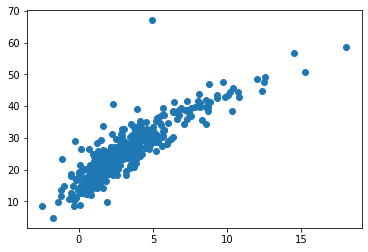

In [20]:
plt.scatter(data["Box Creation"], data["Offensive Load"])
plt.show()

In [26]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=["Offensive Load", "Box Creation"], how="all")

load_ = data["Offensive Load"]
bc = data["Box Creation"]

load.fillna(0)
bc.fillna(0)

load = sm.add_constant(load_)
regr = sm.OLS(bc, load).fit()
pred = regr.predict(load)
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:           Box Creation   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1769.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):          4.59e-160
Time:                        00:59:54   Log-Likelihood:                -755.88
No. Observations:                 464   AIC:                             1516.
Df Residuals:                     462   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.9929      0.173    -23.

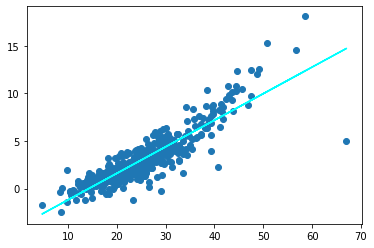

In [28]:
plt.scatter(data["Offensive Load"], data["Box Creation"])
plt.plot(data["Offensive Load"], pred, color="cyan")
plt.show()

In [29]:
bcoe = []

for i in range(len(data["Player"])):
    val1 = data["Box Creation"][i]
    val2 = pred[i]
    diff = val1 - val2
    bcoe.append(diff)
    
data["BCOE"] = bcoe

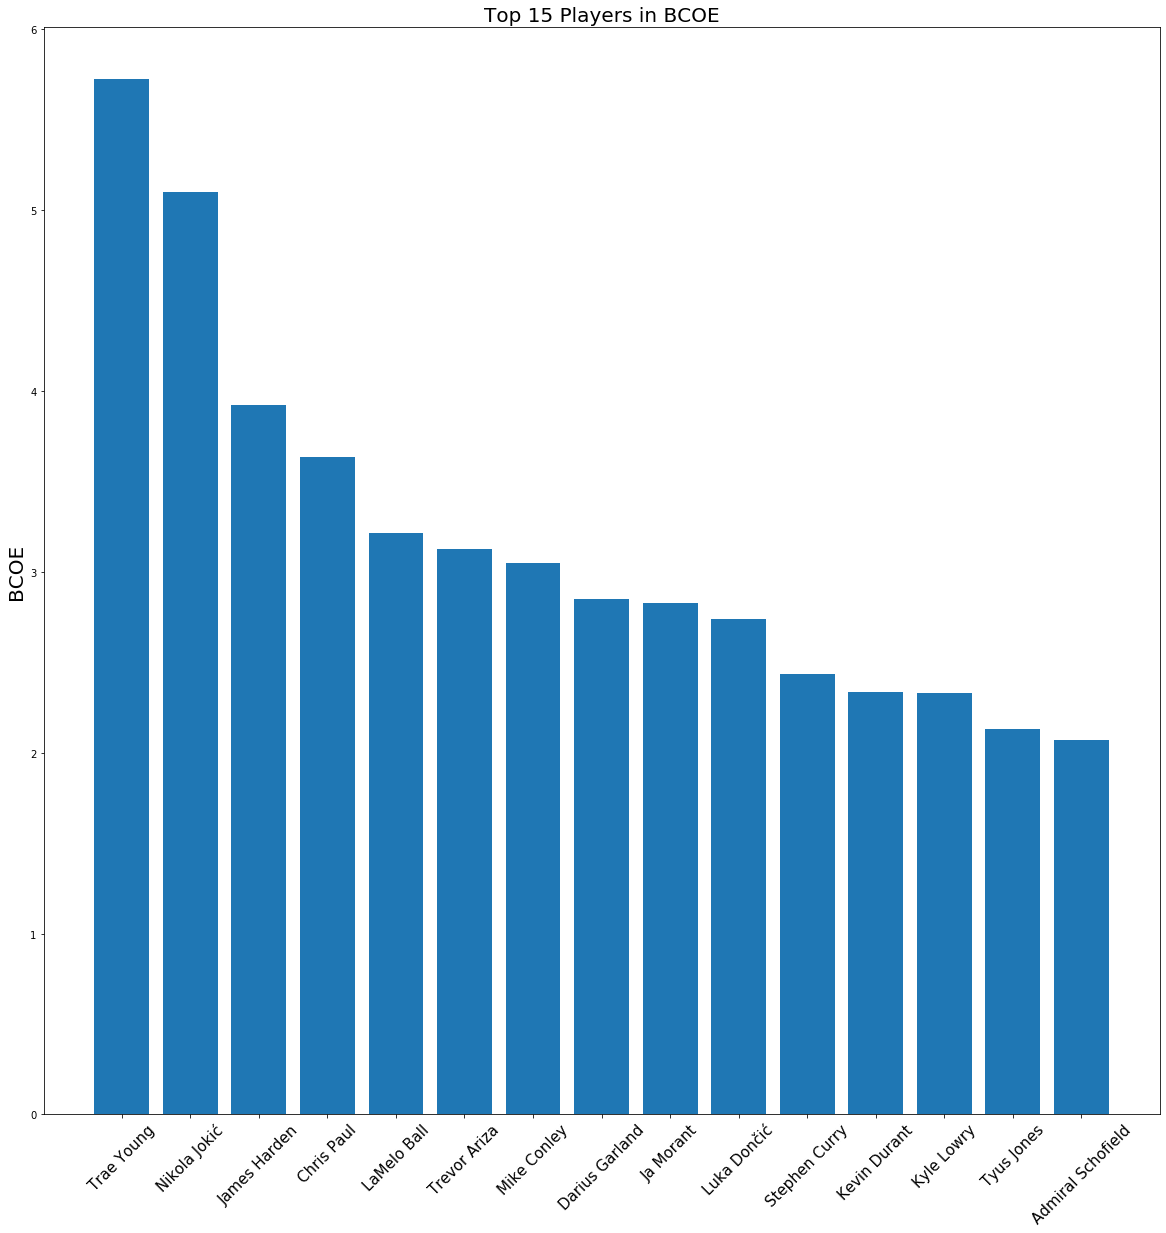

In [41]:
data.sort_values(by=['BCOE'], inplace=True, ascending=False)

d1 = data.head(15)

plt.figure(figsize=(20, 20))
plt.title("Top 15 Players in BCOE", size=20)
plt.ylabel("BCOE", size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size = 10)
plt.bar(d1["Player"], d1["BCOE"])
plt.show()

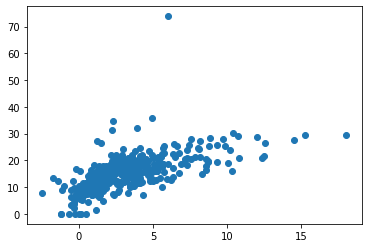

In [45]:
plt.scatter(data["Box Creation"], data["points per 75"])
plt.show()

In [67]:
data.sort_values(by = ["points per 75"], inplace=True, ascending = False)
data2 = data.head(40)

In [68]:
c = data2.iloc[:, 1:3]
print(c)

     points per 75  Box Creation
75          35.700      4.958950
221         34.575      2.297541
113         32.025      3.915564
228         31.200      2.257503
9           30.150     10.436926
1           29.625     15.291402
0           29.475     18.076875
8           29.100     10.759320
6           28.575     12.021890
17          28.200      8.831089
14          28.125      9.724387
30          27.975      7.592701
2           27.600     14.555165
335         27.225      1.193660
25          27.150      8.216396
3           26.625     12.564790
299         26.550      1.469461
43          25.950      6.431917
16          25.800      9.334787
32          25.800      7.426639
41          25.500      6.608014
13          25.425      9.849973
51          25.275      5.733441
18          25.275      8.817318
55          24.750      5.657406
28          24.450      8.073310
101         24.450      4.117137
173         24.375      2.944732
27          24.150      8.145643
11        

Text(0, 0.5, 'WCSS')

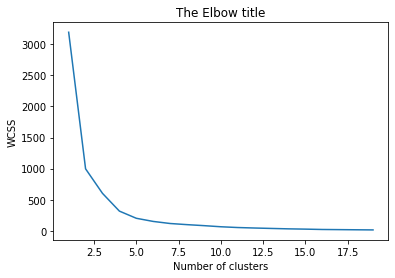

In [61]:
wcss=[]
for j in range(1,20):
    kmeans = KMeans(j)
    kmeans.fit(c)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

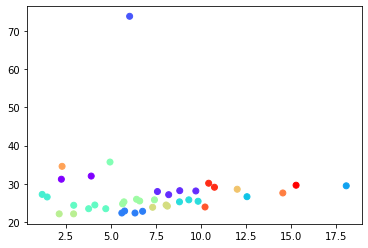

In [62]:
model = KMeans(5)
model.fit(c)
identified_clusters = kmeans.fit_predict(c)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Box Creation'],data_with_clusters['points per 75'],c=data_with_clusters['Clusters'],cmap='rainbow')

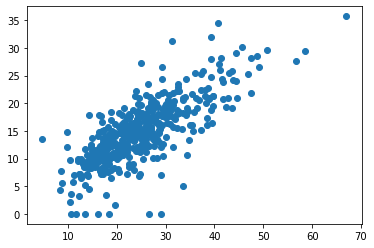

In [66]:
plt.scatter(data["Offensive Load"], data["points per 75"])
plt.show()

In [71]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=["Offensive Load", "points per 75"], how="all")

load1_ = data["Offensive Load"]
pp = data["points per 75"]

load1_.fillna(0)
pp.fillna(0)

load1 = sm.add_constant(load1_)
regr1 = sm.OLS(pp, load1).fit()
pred1 = regr1.predict(load1)
print(regr1.summary())

                            OLS Regression Results                            
Dep. Variable:          points per 75   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.87e-91
Time:                        02:36:17   Log-Likelihood:                -1251.9
No. Observations:                 463   AIC:                             2508.
Df Residuals:                     461   BIC:                             2516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4278      0.507      4.

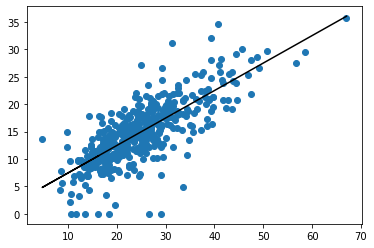

In [72]:
plt.scatter(load1_, pp)
plt.plot(load1_, pred1, color = "black")
plt.show()

In [75]:
ppoe = []

for j in range(len(data["Player"])):
    val1_ = data["points per 75"][j]
    val2_ = pred1[j]
    diff_ = val1_ - val2_
    ppoe.append(diff_)
    
data["PPOE"] = ppoe

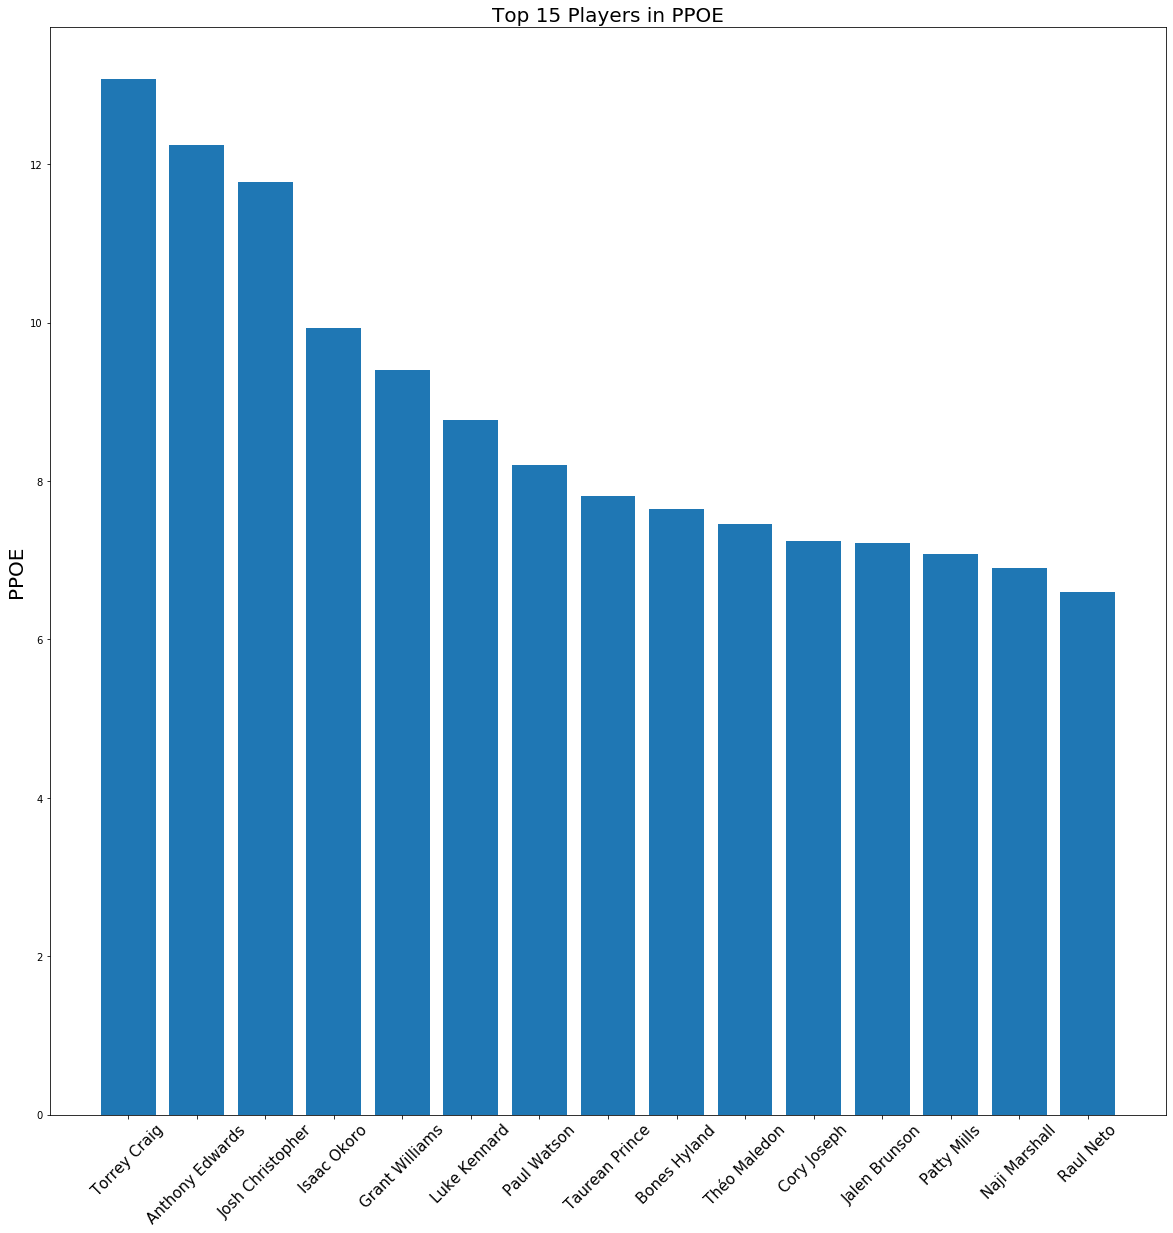

In [76]:
data.sort_values(by=['PPOE'], inplace=True, ascending=False)

d2 = data.head(15)

plt.figure(figsize=(20, 20))
plt.title("Top 15 Players in PPOE", size=20)
plt.ylabel("PPOE", size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size = 10)
plt.bar(d2["Player"], d2["PPOE"])
plt.show()